# What is regression?

Regression is a method of finding a relationship between 2 or more features in a dataset. For this demo, we will be looking at linear regression to predict stock price based on company factors, and then testing how accurate the model actually is.

For this project, we need a few libraries:
- Pandas (dataframes)
- Matplotlib (Visualizations)
-Seaborn (Visualizations)
-Scikit-learn (Data partition, testing, accuracy)
-Statsmodel (Regression)


In [37]:
# Download libraries if needed
#! pip install pandas numpy matplotlib seaborn sklearn statsmodel

In [38]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [39]:
df = pd.read_csv('applefinancials.csv', na_values = [' ', '$-'])

# Data Exploration

In [40]:
# First look at data
df.head()

,Date,Net sales,Net income,EPS,Earnings per diluted share,Cash dividends declared per common share,Common and common equivalent shares used in the calculations of basic earnings per share (Per Thousand),Common and common equivalent shares used in the calculations of diluted earnings per share (Per Thousand),Cash,Total assets,Commercial paper,Long-term debt,Other long-term obligations,Other non-current liabilities,Deferred tax \n liabilities,Total Liabilities,Shareholder's Equity,Price
0,1/1/1991,5558.44,474.90,3.77,NaN,0.44,125813,NaN,997.09,2975.71,NaN,5.44,NaN,NaN,501.83,NaN,NaN,0.395841
1,1/1/1992,6308.85,309.84,2.58,NaN,0.48,120283,NaN,892.72,3493.60,NaN,18.13,NaN,NaN,509.87,NaN,NaN,0.466136
2,1/1/1993,7086.54,530.37,4.33,NaN,0.48,122490,NaN,1435.50,4223.69,NaN,17.74,NaN,NaN,610.80,NaN,NaN,0.432079
3,1/1/1994,7976.95,86.59,0.73,NaN,0.48,119125,NaN,892.30,5171.41,NaN,7.12,NaN,NaN,629.83,NaN,NaN,0.240755
4,1/1/1995,9188.75,310.18,2.61,NaN,0.48,118735,NaN,1257.86,5302.75,NaN,304.47,NaN,NaN,670.67,NaN,NaN,0.300990


In [41]:
# Data Description
df.describe()

,Net sales,Net income,EPS,Earnings per diluted share,Common and common equivalent shares used in the calculations of basic earnings per share (Per Thousand),Common and common equivalent shares used in the calculations of diluted earnings per share (Per Thousand),Cash,Total assets,Commercial paper,Other long-term obligations,Other non-current liabilities,Deferred tax \n liabilities,Total Liabilities,Price
count,34.000000,34.000000,34.000000,29.000000,3.400000e+01,2.900000e+01,34.000000,34.000000,8.000000,8.000000,9.000000,11.000000,24.000000,34.000000
mean,104176.515588,23206.761176,3.813529,3.904483,3.860959e+06,4.551141e+06,75136.955000,120770.563529,7899.000000,23405.625000,47613.777778,4262.636364,110803.416667,27.510635
std,128152.313019,31532.454868,4.216024,4.508775,5.305292e+06,5.538700e+06,91712.734915,146755.754942,2913.124145,12561.097392,5672.927436,4394.964107,116523.958821,51.142287
min,5363.000000,-1045.000000,-8.290000,-8.290000,1.187350e+05,1.230470e+05,892.300000,2975.710000,4996.000000,5531.000000,38104.000000,501.830000,2101.000000,0.125352
25%,7309.142500,309.925000,2.235000,2.100000,1.347698e+05,3.617850e+05,2531.500000,5528.250000,5983.750000,15023.000000,44212.000000,620.315000,6437.750000,0.348346
50%,21660.500000,2742.500000,3.890000,3.930000,8.543265e+05,9.070050e+05,12748.000000,21276.000000,6154.000000,22517.000000,49142.000000,776.000000,48805.000000,2.651954
75%,207428.000000,44698.500000,6.157500,6.290000,6.002534e+06,6.472983e+06,160384.000000,275718.500000,10477.500000,34088.750000,50503.000000,7169.500000,242961.000000,25.107349
max,394328.000000,99803.000000,12.010000,11.910000,1.735212e+07,1.752821e+07,268895.000000,375319.000000,11977.000000,40415.000000,54490.000000,11595.000000,302083.000000,183.702911


In [42]:
# Data shape
df.shape

(34, 18)

In [43]:
# Features
df.columns

Index(['Date', 'Net sales', 'Net income', 'EPS', 'Earnings per diluted share',
       'Cash dividends  declared  per common  share',
       'Common and  common  equivalent  shares used  in the  calculations  of basic earnings per  share (Per Thousand)',
       'Common and  common  equivalent  shares used  in the  calculations  of diluted earnings per  share (Per Thousand)',
       'Cash', 'Total assets', 'Commercial paper', 'Long-term debt',
       'Other long-term obligations', 'Other non-current liabilities',
       'Deferred tax \n liabilities', 'Total Liabilities',
       'Shareholder's Equity', 'Price'],
      dtype='object')

In [44]:
# Check for nulls
df.isna().sum()

Date                                                                                                                 0
Net sales                                                                                                            0
Net income                                                                                                           0
EPS                                                                                                                  0
Earnings per diluted share                                                                                           5
Cash dividends  declared  per common  share                                                                          5
Common and  common  equivalent  shares used  in the  calculations  of basic earnings per  share (Per Thousand)       0
Common and  common  equivalent  shares used  in the  calculations  of diluted earnings per  share (Per Thousand)     5
Cash                                            

In [45]:
# Check for duplicate rows
df.duplicated().sum()

np.int64(0)

# What pre-processing needs to be done?
We can see that some columns have nulls that aren't necessary for my analysis.

In [46]:
# Drop columns with nulls
df = df.drop(['Earnings per diluted share',
       'Cash dividends  declared  per common  share',
       'Common and  common  equivalent  shares used  in the  calculations  of basic earnings per  share (Per Thousand)',
       'Common and  common  equivalent  shares used  in the  calculations  of diluted earnings per  share (Per Thousand)',
       'Commercial paper', 'Long-term debt',
       'Other long-term obligations', 'Other non-current liabilities',
       'Deferred tax \n liabilities', 'Total Liabilities',
       "Shareholder's Equity"], axis=1)

In [47]:
# Convert index to datetime
df.index = pd.to_datetime(df.index)

# Re-analyze the data
After all the pre-processing, what are we left with?

In [48]:
# Look at new data
df.head()

,Date,Net sales,Net income,EPS,Cash,Total assets,Price
1970-01-01 00:00:00.000000000,1/1/1991,5558.44,474.90,3.77,997.09,2975.71,0.395841
1970-01-01 00:00:00.000000001,1/1/1992,6308.85,309.84,2.58,892.72,3493.60,0.466136
1970-01-01 00:00:00.000000002,1/1/1993,7086.54,530.37,4.33,1435.50,4223.69,0.432079
1970-01-01 00:00:00.000000003,1/1/1994,7976.95,86.59,0.73,892.30,5171.41,0.240755
1970-01-01 00:00:00.000000004,1/1/1995,9188.75,310.18,2.61,1257.86,5302.75,0.300990


In [49]:
# New data description
df.describe()

,Net sales,Net income,EPS,Cash,Total assets,Price
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,104176.515588,23206.761176,3.813529,75136.955000,120770.563529,27.510635
std,128152.313019,31532.454868,4.216024,91712.734915,146755.754942,51.142287
min,5363.000000,-1045.000000,-8.290000,892.300000,2975.710000,0.125352
25%,7309.142500,309.925000,2.235000,2531.500000,5528.250000,0.348346
50%,21660.500000,2742.500000,3.890000,12748.000000,21276.000000,2.651954
75%,207428.000000,44698.500000,6.157500,160384.000000,275718.500000,25.107349
max,394328.000000,99803.000000,12.010000,268895.000000,375319.000000,183.702911


In [50]:
# New shape
df.shape

(34, 7)

In [51]:
# New list of features
df.columns

Index(['Date', 'Net sales', 'Net income', 'EPS', 'Cash', 'Total assets',
       'Price'],
      dtype='object')

# Linear Regression

In [52]:
# Define predictors & target
X = df[['Net sales', 'Net income', 'EPS', 'Cash', 'Total assets']]
Y= df['Price']

In [53]:
# Data partition. Random state can be any number, just has to be consistent throughout the code
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state =0) # Random state can be any number, just has to be consistent throughout the code

## Method 1
Using scikit-learn

In [54]:
# Fit regression model
reg = LinearRegression()
reg.fit(X_train, Y_train)
print(reg.score(X_test,Y_test))

0.887055111354335


In [55]:
# Model Prediction
Y_pred1 = reg.predict(X_test)

In [56]:
# Find error between predicted and test values for model 1
mae1 = mean_absolute_error(Y_test, Y_pred1).round(2)
mse1 = mean_squared_error(Y_test, Y_pred1).round(2)
mape1 = ((np.mean(np.abs(Y_test-Y_pred1)/Y_test) * 100)/len(df)).round(2)

print(f"MAE: {mae1}\n MSE:{mse1} \n MAPE:{mape1}%.")

MAE: 10.22
 MSE:370.79 
 MAPE:3.25%.


## Method 2
Using Ordinary Least Squares Regression from statsmodel

In [57]:
# Model fit
model2 = sm.OLS(Y_train, X_train).fit()

In [58]:
# Model summary
print(model2.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.958
Model:                            OLS   Adj. R-squared (uncentered):              0.955
Method:                 Least Squares   F-statistic:                              287.6
Date:                Thu, 10 Oct 2024   Prob (F-statistic):                    5.57e-18
Time:                        17:13:19   Log-Likelihood:                         -103.49
No. Observations:                  27   AIC:                                      211.0
Df Residuals:                      25   BIC:                                      213.6
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [59]:
# Remove insignificant feature
X = X.drop(['Net sales'], axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state =0)

In [60]:
# Re-run the model
model2 = sm.OLS(Y_train, X_train).fit()

In [61]:
# Re-run model summary
print(model2.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.966
Model:                            OLS   Adj. R-squared (uncentered):              0.960
Method:                 Least Squares   F-statistic:                              164.2
Date:                Thu, 10 Oct 2024   Prob (F-statistic):                    1.48e-16
Time:                        17:13:19   Log-Likelihood:                         -100.69
No. Observations:                  27   AIC:                                      209.4
Df Residuals:                      23   BIC:                                      214.6
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [62]:
X = X.drop(['Net income'], axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state =0)
model2 = sm.OLS(Y_train, X_train).fit()
print(model2.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.964
Model:                            OLS   Adj. R-squared (uncentered):              0.960
Method:                 Least Squares   F-statistic:                              216.1
Date:                Thu, 10 Oct 2024   Prob (F-statistic):                    1.70e-17
Time:                        17:13:19   Log-Likelihood:                         -101.41
No. Observations:                  27   AIC:                                      208.8
Df Residuals:                      24   BIC:                                      212.7
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [63]:
X = X.drop(['EPS'], axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state =0)
model2 = sm.OLS(Y_train, X_train).fit()
print(model2.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.958
Model:                            OLS   Adj. R-squared (uncentered):              0.955
Method:                 Least Squares   F-statistic:                              287.6
Date:                Thu, 10 Oct 2024   Prob (F-statistic):                    5.57e-18
Time:                        17:13:19   Log-Likelihood:                         -103.49
No. Observations:                  27   AIC:                                      211.0
Df Residuals:                      25   BIC:                                      213.6
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

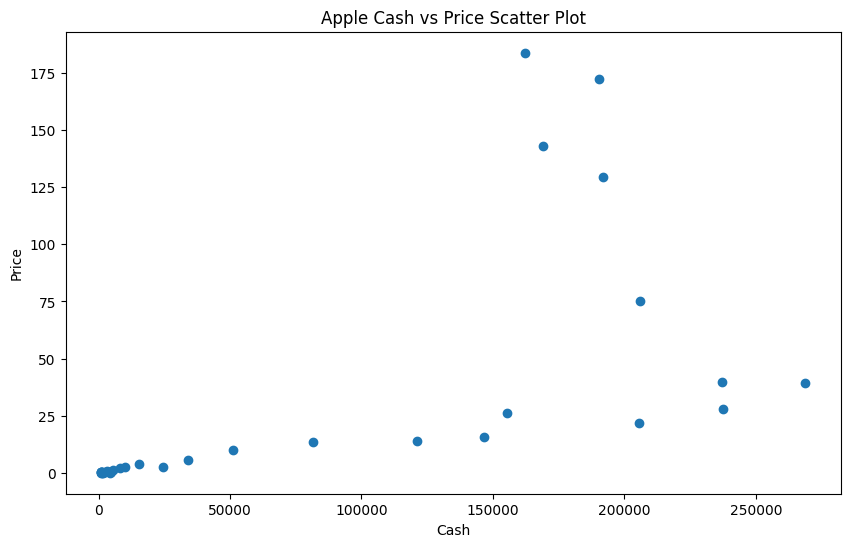

In [64]:
# Visualizations
plt.figure(figsize=(10, 6))
plt.scatter(df['Cash'], df['Price'])
plt.xlabel('Cash')
plt.ylabel('Price')
plt.title('Apple Cash vs Price Scatter Plot')
plt.show()

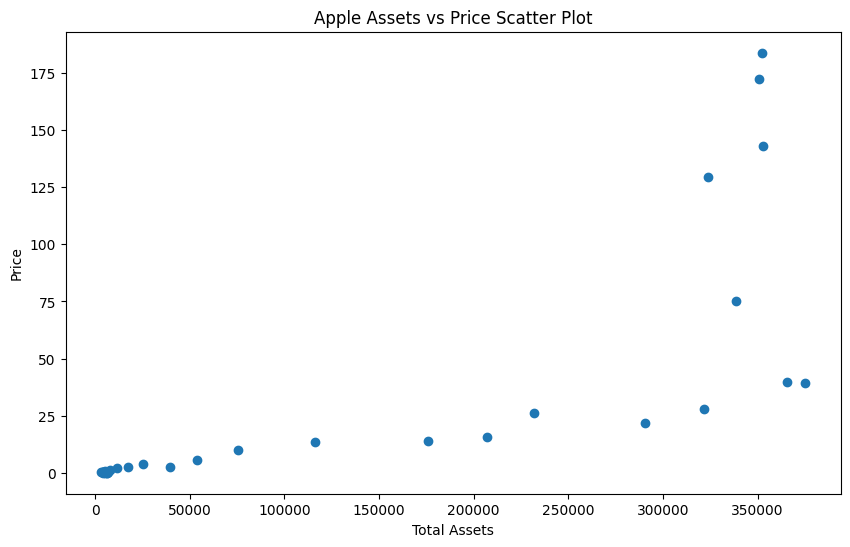

In [65]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Total assets'], df['Price'])
plt.xlabel('Total Assets')
plt.ylabel('Price')
plt.title('Apple Assets vs Price Scatter Plot')
plt.show()

In [66]:
# Predict Y-values using models
Y_pred2 = model2.predict(X_test)

In [67]:
# Find error between predicted and test values for model 2
mae2 = mean_absolute_error(Y_test, Y_pred2).round(2)
mse2 = mean_squared_error(Y_test, Y_pred2).round(2)
mape2 = ((np.mean(np.abs(Y_test-Y_pred2)/Y_test) * 100)/len(df)).round(2)

print(f"MAE: {mae2}\n MSE:{mse2} \n MAPE:{mape2}%.")

MAE: 10.37
 MSE:378.19 
 MAPE:3.06%.
